# 19 — Axes, Ticks, Spines, Scales, and Multiple Y-Axes

## Goal
Control the coordinate system: axes limits, tick formatting, spine visibility, log scales, and dual axes.

### What you'll learn
- Limits and aspect
- Tick locators and formatters
- Log scales and symlog
- Spine control for clean design
- `twinx()` for multiple y-axes (with caveats)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete')

✅ Setup complete


## 1. Limits, Aspect, and Clean Spines

```python
ax.set_xlim(0, 10); ax.set_ylim(-1, 1)
ax.set_aspect('auto')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
```


=== SPINES + LIMITS ===


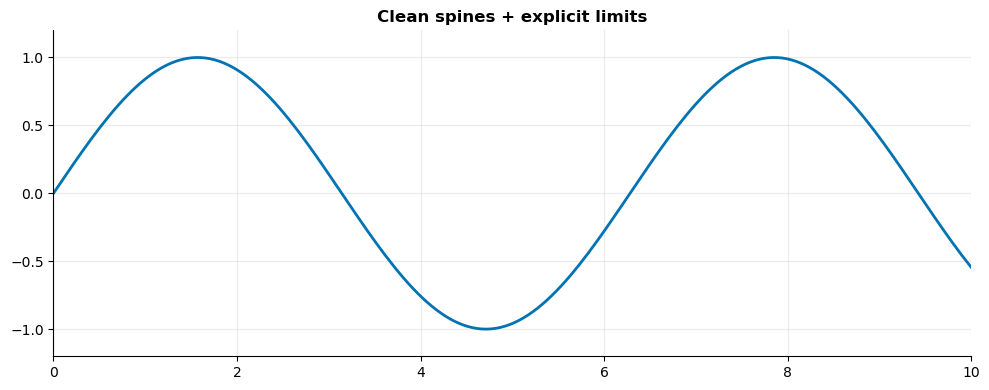

In [2]:
print('=== SPINES + LIMITS ===')
x = np.linspace(0, 10, 200)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, y, color='#0173B2', lw=2)
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.2)
ax.set_title('Clean spines + explicit limits', fontweight='bold')
ax.grid(True, alpha=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

## 2. Tick Locators & Formatters

Locators control *where* ticks appear; formatters control *how* they display.

```python
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f'{v:.1f}'))
```


=== CUSTOM TICKS ===


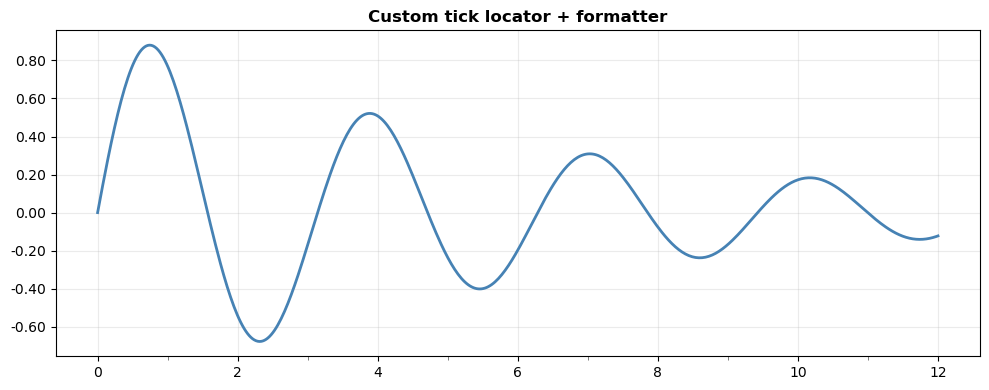

In [3]:
print('=== CUSTOM TICKS ===')
x = np.linspace(0, 12, 500)
y = np.exp(-x/6) * np.sin(2*x)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, y, lw=2, color='steelblue')
ax.set_title('Custom tick locator + formatter', fontweight='bold')
ax.grid(True, alpha=0.25)
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f'{v:.2f}'))
ax.tick_params(which='minor', length=3, color='0.4')
plt.tight_layout()
plt.show()

## 3. Log Scales and symlog

Log scales are essential for heavy-tailed data. Use `symlog` if your data crosses zero.

```python
ax.set_yscale('log')
ax.set_yscale('symlog', linthresh=1)
```


=== LOG SCALE EXAMPLE ===


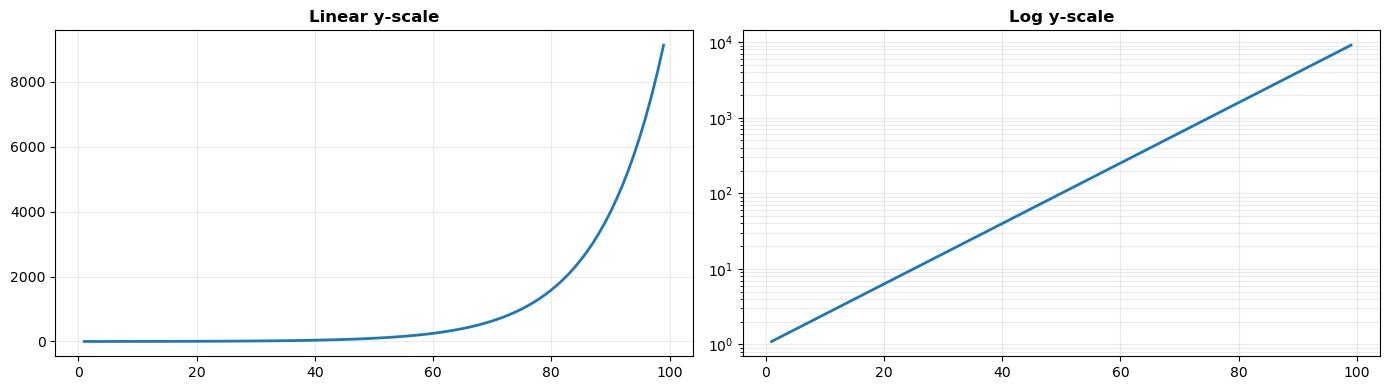

In [4]:
print('=== LOG SCALE EXAMPLE ===')
x = np.arange(1, 100)
y = 10 ** (x / 25)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].plot(x, y, lw=2)
axes[0].set_title('Linear y-scale', fontweight='bold')
axes[0].grid(True, alpha=0.25)

axes[1].plot(x, y, lw=2)
axes[1].set_yscale('log')
axes[1].set_title('Log y-scale', fontweight='bold')
axes[1].grid(True, which='both', alpha=0.25)

plt.tight_layout()
plt.show()

## 4. Multiple Y-Axes (twinx) — Use Carefully

`twinx()` adds a second y-axis sharing the same x-axis. Use it only when scales are different but trends share a common x.

```python
ax2 = ax.twinx()
ax.plot(x, y1)
ax2.plot(x, y2)
```

### Caveats
- Can mislead if axes ranges are chosen poorly.
- Consider small multiples (two subplots) when possible.


=== TWIN Y-AXES ===


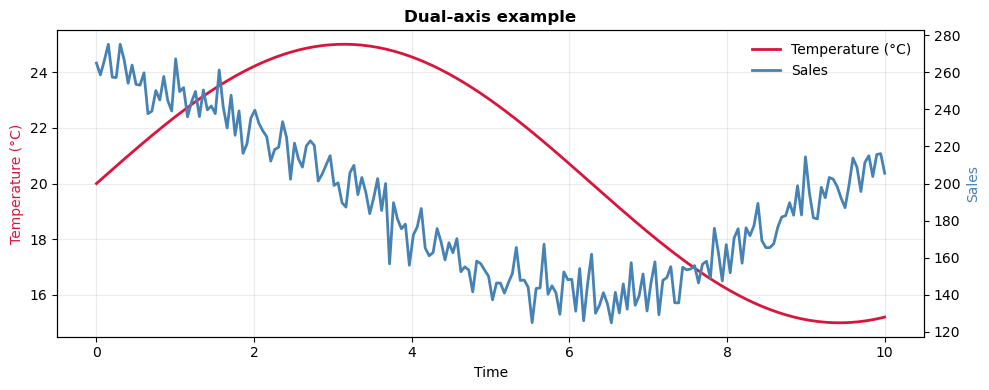

In [5]:
print('=== TWIN Y-AXES ===')
x = np.linspace(0, 10, 200)
temp = 20 + 5*np.sin(x/2)
sales = 200 + 60*np.cos(x/2) + 10*np.random.randn(len(x))

fig, ax = plt.subplots(figsize=(10, 4))
ax2 = ax.twinx()

l1 = ax.plot(x, temp, color='crimson', lw=2, label='Temperature (°C)')
l2 = ax2.plot(x, sales, color='steelblue', lw=2, label='Sales')

ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)', color='crimson')
ax2.set_ylabel('Sales', color='steelblue')
ax.set_title('Dual-axis example', fontweight='bold')
ax.grid(True, alpha=0.25)

lines = l1 + l2
labels = [ln.get_label() for ln in lines]
ax.legend(lines, labels, frameon=False, loc='upper right')

plt.tight_layout()
plt.show()

## Practice + Quick Reference

### Practice
1. Create custom major/minor ticks for a time series.
2. Create a plot with log y-scale and annotate a decade change.
3. Hide top/right spines for a cleaner plot.
4. Replace a dual-axis plot with two stacked subplots sharing x.

### Quick reference
```python
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(...))
ax.set_yscale('log')
ax.spines['top'].set_visible(False)
ax2 = ax.twinx()
```
